<a href="https://colab.research.google.com/github/shahinul22/machine-learning-pretrained-model-/blob/main/EfficientNetB0forBigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)  # should be >= 2.8


2.19.0


In [2]:
from tensorflow.keras.applications import EfficientNetB0

# Load model with ImageNet weights
model = EfficientNetB0(weights="imagenet")

# Show model summary
model.summary()

21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 5,330,571 (20.33 MB)

 Trainable params: 5,288,548 (20.17 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
from google.colab import files
files.upload()  # Select your dataset.zip file
!unzip dataset.zip -d dataset/


Streaming output truncated to the last 5000 lines.
  inflating: dataset/Bacterialblight/BACTERIALBLIGHT1_141.JPG  
  inflating: dataset/Bacterialblight/BACTERIALBLIGHT1_142.JPG  
  inflating: dataset/Bacterialblight/BACTERIALBLIGHT1_143.JPG  
  inflating: dataset/Bacterialblight/BACTERIALBLIGHT1_144.JPG  
  inflating: dataset/Bacterialblight/BACTERIALBLIGHT1_145.JPG  
  inflating: dataset/Bacterialblight/BACTERIALBLIGHT1_146.JPG  
  inflating: dataset/Bacterialblight/BACTERIALBLIGHT1_147.jpg  
  inflating: dataset/Bacterialblight/BACTERIALBLIGHT1_148.jpg  
  inflating: dataset/Bacterialblight/BACTERIALBLIGHT1_149.jpg  
  inflating: dataset/Bacterialblight/BACTERIALBLIGHT1_150.jpg  
  inflating: dataset/Bacterialblight/BACTERIALBLIGHT1_151.jpg  
  inflating: dataset/Bacterialblight/BACTERIALBLIGHT1_152.jpg  
  inflating: dataset/Bacterialblight/BACTERIALBLIGHT1_153.jpg  
  inflating: dataset/Bacterialblight/BACTERIALBLIGHT1_154.jpg  
  inflating: dataset/Bacterialblight/BACTERIALBLIGHT1

In [5]:
!ls -R /content/dataset | head -50



/content/dataset:
Bacterialblight
Blast
Brownspot
Tungro

/content/dataset/Bacterialblight:
BACTERAILBLIGHT3_001.jpg
BACTERAILBLIGHT3_002.jpg
BACTERAILBLIGHT3_003.jpg
BACTERAILBLIGHT3_004.jpg
BACTERAILBLIGHT3_005.jpg
BACTERAILBLIGHT3_006.jpg
BACTERAILBLIGHT3_007.jpg
BACTERAILBLIGHT3_008.jpg
BACTERAILBLIGHT3_009.jpg
BACTERAILBLIGHT3_010.jpg
BACTERAILBLIGHT3_011.jpg
BACTERAILBLIGHT3_012.jpg
BACTERAILBLIGHT3_013.jpg
BACTERAILBLIGHT3_014.jpg
BACTERAILBLIGHT3_015.jpg
BACTERAILBLIGHT3_016.jpg
BACTERAILBLIGHT3_017.jpg
BACTERAILBLIGHT3_018.jpg
BACTERAILBLIGHT3_019.jpg
BACTERAILBLIGHT3_020.jpg
BACTERAILBLIGHT3_021.jpg
BACTERAILBLIGHT3_022.jpg
BACTERAILBLIGHT3_023.jpg
BACTERAILBLIGHT3_024.jpg
BACTERAILBLIGHT3_025.jpg
BACTERAILBLIGHT3_026.jpg
BACTERAILBLIGHT3_027.jpg
BACTERAILBLIGHT3_028.jpg
BACTERAILBLIGHT3_029.jpg
BACTERAILBLIGHT3_030.jpg
BACTERAILBLIGHT3_031.jpg
BACTERAILBLIGHT3_032.jpg
BACTERAILBLIGHT3_033.jpg
BACTERAILBLIGHT3_034.jpg
BACTERAILBLIGHT3_035.jpg
BACTERAILBLIGHT3_036.jpg
BACTERAI

In [6]:
# =========================================
# STEP 0: Setup
# =========================================
!nvidia-smi   # check GPU
!pip install -q tensorflow matplotlib scikit-learn opencv-python

from google.colab import drive
drive.mount('/content/drive')

# =========================================
# STEP 1: Data pipeline (using validation_split)
# =========================================
import tensorflow as tf
import numpy as np, json
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.utils.class_weight import compute_class_weight

IMG_SIZE = (224,224)
BATCH_SIZE = 32
DATASET_DIR = "/content/dataset"

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=42
)

val_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

# Compute class weights (to fix imbalance)
y_train = train_data.classes
classes = np.unique(y_train)
class_weights_arr = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weights = {i: w for i, w in enumerate(class_weights_arr)}
print("Class weights:", class_weights)

# Save label mapping
label_map = {cls: idx for cls, idx in train_data.class_indices.items()}
with open("/content/drive/MyDrive/class_indices.json", "w") as f:
    json.dump(label_map, f, indent=2)
print("Saved label map:", label_map)

# =========================================
# STEP 2: Build EfficientNet-B0 Model
# =========================================
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

base = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224,224,3))
base.trainable = False   # freeze for stage 1

inputs = layers.Input(shape=(224,224,3))
x = base(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(train_data.num_classes, activation="softmax")(x)
model = models.Model(inputs, outputs)

model.compile(optimizer=optimizers.Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

# =========================================
# STEP 3: Train (Stage 1)
# =========================================
ckpt_stage1 = "/content/drive/MyDrive/rice_efficientnetb0_stage1.keras"
cbs = [
    EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
    ModelCheckpoint(ckpt_stage1, monitor="val_accuracy", save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

history1 = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    class_weight=class_weights,
    callbacks=cbs
)

# Save stage 1 model
model.save("/content/drive/MyDrive/rice_disease_efficientnetb0_stage1.keras")

# =========================================
# STEP 4: Fine-tune (unfreeze top layers)
# =========================================
for layer in base.layers[-40:]:   # unfreeze last 40 layers
    layer.trainable = True

model.compile(optimizer=optimizers.Adam(5e-5),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

ckpt_final = "/content/drive/MyDrive/rice_efficientnetb0_final.keras"
cbs_ft = [
    EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
    ModelCheckpoint(ckpt_final, monitor="val_accuracy", save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

history2 = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    class_weight=class_weights,
    callbacks=cbs_ft
)

# Save final model
model.save("/content/drive/MyDrive/rice_disease_efficientnetb0_final.keras")

# =========================================
# STEP 5: Evaluate
# =========================================
val_loss, val_acc = model.evaluate(val_data, verbose=0)
print(f"Final Validation Accuracy: {val_acc*100:.2f}%")


Mon Aug 25 13:16:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   72C    P0             30W /   70W |     166MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.7231 - loss: 0.7283
Epoch 1: val_accuracy improved from -inf to 0.95781, saving model to /content/drive/MyDrive/rice_efficientnetb0_stage1.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 88s 380ms/step - accuracy: 0.7238 - loss: 0.7267 - val_accuracy: 0.9578 - val_loss: 0.2323 - learning_rate: 0.0010
Epoch 2/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9454 - loss: 0.2178
Epoch 2: val_accuracy improved from 0.95781 to 0.97890, saving model to /content/drive/MyDrive/rice_efficientnetb0_stage1.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.9454 - loss: 0.2177 - val_accuracy: 0.9789 - val_loss: 0.1370 - learning_rate: 0.0010
Epoch 3/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9684 - loss: 0.1444
Epoch 3: val_accuracy improved from 0.97890 to 0.98734, saving model to /content/drive/MyDrive/rice_efficientnetb0_stage1.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.9684 - loss:

38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 286ms/step


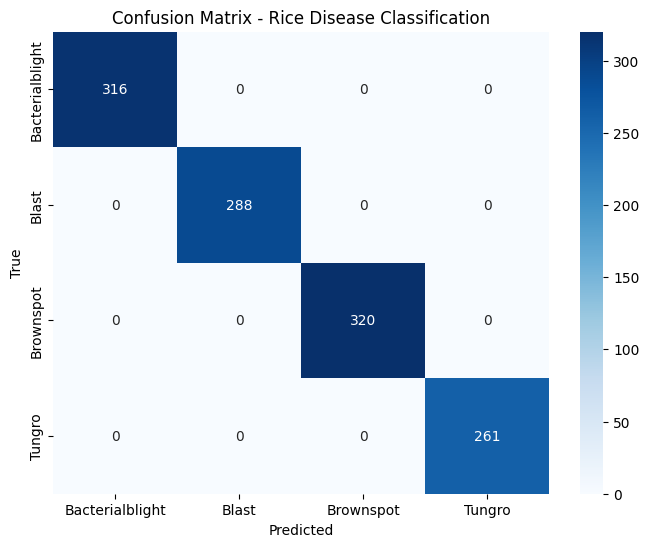

Classification Report:
                  precision    recall  f1-score   support

Bacterialblight       1.00      1.00      1.00       316
          Blast       1.00      1.00      1.00       288
      Brownspot       1.00      1.00      1.00       320
         Tungro       1.00      1.00      1.00       261

       accuracy                           1.00      1185
      macro avg       1.00      1.00      1.00      1185
   weighted avg       1.00      1.00      1.00      1185



In [7]:
# =========================================
# STEP 6: Confusion Matrix & Classification Report
# =========================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions
y_true = val_data.classes
y_pred = model.predict(val_data, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get actual class names by filtering out non-class directories
class_names = [cls for cls in val_data.class_indices.keys() if cls not in ['.ipynb_checkpoints', 'randomData']]
# Map class indices to their corresponding names for the report
target_names = [name for name, idx in sorted(val_data.class_indices.items()) if name in class_names]
# Get the corresponding labels (indices) for the actual classes
labels = [val_data.class_indices[name] for name in class_names]

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Rice Disease Classification")
plt.show()

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=target_names, labels=labels)
print("Classification Report:\n", report)

In [8]:
import os, json
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# =========================================
# Load final model + labels
# =========================================
MODEL_PATH = "/content/drive/MyDrive/rice_disease_efficientnetb0_final.keras"
LABELS_JSON = "/content/drive/MyDrive/class_indices.json"

model = load_model(MODEL_PATH)

with open(LABELS_JSON) as f:
    label_map = json.load(f)

# Convert to index→class mapping
index_to_class = {v: k for k, v in label_map.items()}
print("Labels:", index_to_class)

# =========================================
# Test folder (choose one disease class)
# =========================================
test_folder = "/content/dataset/Brownspot"

for fname in os.listdir(test_folder):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        path = os.path.join(test_folder, fname)

        # Load & preprocess image
        img = image.load_img(path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Predict
        probs = model.predict(x, verbose=0)[0]
        idx = int(np.argmax(probs))
        pred_class = index_to_class[idx]

        print(f"{fname:25s} → {pred_class:15s} ({probs[idx]:.3f}) | probs={np.round(probs,3)}")


Labels: {0: 'Bacterialblight', 1: 'Blast', 2: 'Brownspot', 3: 'Tungro'}
brownspot_orig_051.jpg    → Brownspot       (1.000) | probs=[0. 0. 1. 0.]
BROWNSPOT3_082.jpg        → Brownspot       (0.999) | probs=[0.    0.001 0.999 0.   ]
BROWNSPOT4_124.jpg        → Brownspot       (1.000) | probs=[0. 0. 1. 0.]
BROWNSPOT2_145.jpg        → Brownspot       (1.000) | probs=[0. 0. 1. 0.]
brownspot_rotated_034.jpg → Brownspot       (0.997) | probs=[0.001 0.002 0.997 0.   ]
BROWNSPOT2_028.jpg        → Brownspot       (1.000) | probs=[0. 0. 1. 0.]
BROWNSPOT5_036.jpg        → Brownspot       (0.999) | probs=[0.    0.    0.999 0.001]
BROWNSPOT6_071.jpg        → Brownspot       (1.000) | probs=[0. 0. 1. 0.]
BROWNSPOT4_172.jpg        → Brownspot       (0.999) | probs=[0.001 0.    0.999 0.   ]
BROWNSPOT1_080.jpg        → Brownspot       (1.000) | probs=[0. 0. 1. 0.]
BROWNSPOT4_067.jpg        → Brownspot       (0.993) | probs=[0.001 0.005 0.993 0.   ]
BROWNSPOT6_149.jpg        → Brownspot       (1.000) | 

In [ ]:
import os, json
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# =========================================
# Load final model + labels
# =========================================
MODEL_PATH = "/content/drive/MyDrive/rice_disease_efficientnetb0_final.keras"
LABELS_JSON = "/content/drive/MyDrive/class_indices.json"

model = load_model(MODEL_PATH)

with open(LABELS_JSON) as f:
    label_map = json.load(f)

# Convert to index→class mapping
index_to_class = {v: k for k, v in label_map.items()}
print("Labels:", index_to_class)

# =========================================
# Test folder (choose one disease class)
# =========================================
test_folder = "/content/dataset/Tungro"

for fname in os.listdir(test_folder):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        path = os.path.join(test_folder, fname)

        # Load & preprocess image
        img = image.load_img(path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Predict
        probs = model.predict(x, verbose=0)[0]
        idx = int(np.argmax(probs))
        pred_class = index_to_class[idx]

        print(f"{fname:25s} → {pred_class:15s} ({probs[idx]:.3f}) | probs={np.round(probs,3)}")


Labels: {0: 'Bacterialblight', 1: 'Blast', 2: 'Brownspot', 3: 'Tungro'}
TUNGRO3_090.jpg           → Tungro          (1.000) | probs=[0. 0. 0. 1.]
TUNGRO4_170.JPG           → Tungro          (1.000) | probs=[0. 0. 0. 1.]
TUNGRO2_121.JPG           → Tungro          (1.000) | probs=[0. 0. 0. 1.]
TUNGRO4_102.JPG           → Tungro          (1.000) | probs=[0. 0. 0. 1.]
TUNGRO5_76.JPG            → Tungro          (1.000) | probs=[0. 0. 0. 1.]
TUNGRO1_080.jpg           → Tungro          (1.000) | probs=[0. 0. 0. 1.]
TUNGRO4_229.JPG           → Tungro          (1.000) | probs=[0. 0. 0. 1.]
TUNGRO5_1.jpg             → Tungro          (1.000) | probs=[0. 0. 0. 1.]
TUNGRO1_231.JPG           → Tungro          (1.000) | probs=[0. 0. 0. 1.]
TUNGRO3_126.JPG           → Tungro          (1.000) | probs=[0. 0. 0. 1.]
TUNGRO4_174.JPG           → Tungro          (1.000) | probs=[0. 0. 0. 1.]
TUNGRO2_092.JPG           → Tungro          (1.000) | probs=[0. 0. 0. 1.]
TUNGRO2_024.jpg           → Tungro      

In [ ]:
import os, json
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# =========================================
# Load final model + labels
# =========================================
MODEL_PATH = "/content/drive/MyDrive/rice_disease_efficientnetb0_final.keras"
LABELS_JSON = "/content/drive/MyDrive/class_indices.json"

model = load_model(MODEL_PATH)

with open(LABELS_JSON) as f:
    label_map = json.load(f)

# Convert to index→class mapping
index_to_class = {v: k for k, v in label_map.items()}
print("Labels:", index_to_class)

# =========================================
# Test folder (choose one disease class)
# =========================================
test_folder = "/content/dataset/Bacterialblight"

for fname in os.listdir(test_folder):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        path = os.path.join(test_folder, fname)

        # Load & preprocess image
        img = image.load_img(path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Predict
        probs = model.predict(x, verbose=0)[0]
        idx = int(np.argmax(probs))
        pred_class = index_to_class[idx]

        print(f"{fname:25s} → {pred_class:15s} ({probs[idx]:.3f}) | probs={np.round(probs,3)}")


Labels: {0: 'Bacterialblight', 1: 'Blast', 2: 'Brownspot', 3: 'Tungro'}
BACTERIALBLIGHT_073.jpg   → Bacterialblight (0.993) | probs=[0.993 0.002 0.006 0.   ]
BACTERAILBLIGHT5_135.JPG  → Bacterialblight (0.999) | probs=[0.999 0.001 0.    0.001]
BACTERIALBLIGHT2_097.jpg  → Bacterialblight (0.980) | probs=[0.98 0.02 0.   0.  ]
BACTERIALBLIGHT_206.JPG   → Bacterialblight (1.000) | probs=[1. 0. 0. 0.]
BACTERIALBLIGHT2_017.jpg  → Bacterialblight (0.998) | probs=[0.998 0.001 0.    0.   ]
BACTERIALBLIGHT1_095.jpg  → Bacterialblight (0.980) | probs=[0.98  0.019 0.    0.001]
BACTERIALBLIGHT_226.jpg   → Bacterialblight (0.997) | probs=[0.997 0.002 0.002 0.   ]
BACTERIALBLIGHT1_188.jpg  → Bacterialblight (0.999) | probs=[0.999 0.001 0.    0.   ]
BACTERAILBLIGHT5_176.jpg  → Bacterialblight (1.000) | probs=[1. 0. 0. 0.]
BACTERAILBLIGHT5_142.JPG  → Bacterialblight (0.996) | probs=[0.996 0.004 0.    0.   ]
BACTERIALBLIGHT2_132.JPG  → Bacterialblight (0.999) | probs=[0.999 0.001 0.    0.   ]
BACTERIALB

In [ ]:
import os, json
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# =========================================
# Load final model + labels
# =========================================
MODEL_PATH = "/content/drive/MyDrive/rice_disease_efficientnetb0_final.keras"
LABELS_JSON = "/content/drive/MyDrive/class_indices.json"

model = load_model(MODEL_PATH)

with open(LABELS_JSON) as f:
    label_map = json.load(f)

# Convert to index→class mapping
index_to_class = {v: k for k, v in label_map.items()}
print("Labels:", index_to_class)

# =========================================
# Test folder (choose one disease class)
# =========================================
test_folder = "/content/dataset/Blast"

for fname in os.listdir(test_folder):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        path = os.path.join(test_folder, fname)

        # Load & preprocess image
        img = image.load_img(path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Predict
        probs = model.predict(x, verbose=0)[0]
        idx = int(np.argmax(probs))
        pred_class = index_to_class[idx]

        print(f"{fname:25s} → {pred_class:15s} ({probs[idx]:.3f}) | probs={np.round(probs,3)}")


Labels: {0: 'Bacterialblight', 1: 'Blast', 2: 'Brownspot', 3: 'Tungro'}
BLAST5_077.jpg            → Blast           (0.997) | probs=[0.003 0.997 0.    0.   ]
BLAST2_017.jpg            → Blast           (0.685) | probs=[0.007 0.685 0.306 0.002]
BLAST3_075.jpg            → Blast           (1.000) | probs=[0. 1. 0. 0.]
BLAST8_104.jpg            → Blast           (0.995) | probs=[0.001 0.995 0.004 0.   ]
BLAST7_026.jpg            → Blast           (0.999) | probs=[0.001 0.999 0.    0.   ]
BLAST4_084.jpg            → Blast           (0.996) | probs=[0.004 0.996 0.    0.   ]
BLAST7_130.JPG            → Blast           (0.985) | probs=[0.014 0.985 0.    0.001]
BLAST4_159.jpg            → Blast           (0.998) | probs=[0.001 0.998 0.001 0.   ]
BLAST8_132.JPG            → Blast           (1.000) | probs=[0. 1. 0. 0.]
BLAST3_071.JPG            → Blast           (0.987) | probs=[0.011 0.987 0.    0.001]
BLAST7_074.jpg            → Blast           (0.999) | probs=[0.001 0.999 0.    0.   ]
BLAST7

In [ ]:
!ls -R /content/dataset | head -50


/content/dataset:
Bacterialblight
Blast
Brownspot
Tungro

/content/dataset/Bacterialblight:
BACTERAILBLIGHT3_001.jpg
BACTERAILBLIGHT3_002.jpg
BACTERAILBLIGHT3_003.jpg
BACTERAILBLIGHT3_004.jpg
BACTERAILBLIGHT3_005.jpg
BACTERAILBLIGHT3_006.jpg
BACTERAILBLIGHT3_007.jpg
BACTERAILBLIGHT3_008.jpg
BACTERAILBLIGHT3_009.jpg
BACTERAILBLIGHT3_010.jpg
BACTERAILBLIGHT3_011.jpg
BACTERAILBLIGHT3_012.jpg
BACTERAILBLIGHT3_013.jpg
BACTERAILBLIGHT3_014.jpg
BACTERAILBLIGHT3_015.jpg
BACTERAILBLIGHT3_016.jpg
BACTERAILBLIGHT3_017.jpg
BACTERAILBLIGHT3_018.jpg
BACTERAILBLIGHT3_019.jpg
BACTERAILBLIGHT3_020.jpg
BACTERAILBLIGHT3_021.jpg
BACTERAILBLIGHT3_022.jpg
BACTERAILBLIGHT3_023.jpg
BACTERAILBLIGHT3_024.jpg
BACTERAILBLIGHT3_025.jpg
BACTERAILBLIGHT3_026.jpg
BACTERAILBLIGHT3_027.jpg
BACTERAILBLIGHT3_028.jpg
BACTERAILBLIGHT3_029.jpg
BACTERAILBLIGHT3_030.jpg
BACTERAILBLIGHT3_031.jpg
BACTERAILBLIGHT3_032.jpg
BACTERAILBLIGHT3_033.jpg
BACTERAILBLIGHT3_034.jpg
BACTERAILBLIGHT3_035.jpg
BACTERAILBLIGHT3_036.jpg
BACTERAI

In [ ]:
import os

# Path where test folder should be created
test_path = "/content/dataset/test"

# Create the folder if it does not exist
os.makedirs(test_path, exist_ok=True)

print("Test folder created at:", test_path)


Test folder created at: /content/dataset/test


In [10]:
import os, json
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# =========================================
# Load final model + labels
# =========================================
MODEL_PATH = "/content/drive/MyDrive/rice_disease_efficientnetb0_final.keras"
LABELS_JSON = "/content/drive/MyDrive/class_indices.json"

model = load_model(MODEL_PATH)

with open(LABELS_JSON) as f:
    label_map = json.load(f)

# Convert to index→class mapping
index_to_class = {v: k for k, v in label_map.items()}
print("Labels:", index_to_class)

# =========================================
# Test folder (choose one disease class)
# =========================================
test_folder = "/content/dataset/randomData"

for fname in os.listdir(test_folder):
    if fname.lower().endswith((".jpg", ".jpeg", ".png", ".webp")):
        path = os.path.join(test_folder, fname)

        # Load & preprocess image
        img = image.load_img(path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Predict
        probs = model.predict(x, verbose=0)[0]
        idx = int(np.argmax(probs))
        pred_class = index_to_class[idx]

        print(f"{fname:25s} → {pred_class:15s} ({probs[idx]:.3f}) | probs={np.round(probs,3)}")


Labels: {0: 'Bacterialblight', 1: 'Blast', 2: 'Brownspot', 3: 'Tungro'}
What-is-rice-blast-disease-1536x1042.png → Bacterialblight (0.913) | probs=[0.913 0.07  0.    0.017]
t2.jpg                    → Bacterialblight (0.516) | probs=[0.516 0.479 0.    0.005]
Rice-Blast-Disease-Symptoms-Signs-Disease-Cycle-and-Management.png → Blast           (0.946) | probs=[0.008 0.946 0.039 0.007]
Rice-Blast-Disease-Symptoms-and-signs-1.jpg → Blast           (0.998) | probs=[0.    0.998 0.    0.002]
t3.jpg                    → Blast           (0.994) | probs=[0.    0.994 0.006 0.   ]
management-of-rice-blast-bangladesh-1.jpg → Blast           (0.972) | probs=[0.018 0.972 0.007 0.003]
t1.jpg                    → Bacterialblight (0.944) | probs=[0.944 0.056 0.    0.   ]
management-of-rice-blast-bangladesh-2.jpg → Blast           (0.849) | probs=[0.089 0.849 0.028 0.034]


In [ ]:
import os, json
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# =========================================
# Load final model + labels
# =========================================
MODEL_PATH = "/content/drive/MyDrive/rice_disease_efficientnetb0_final.keras"
LABELS_JSON = "/content/drive/MyDrive/class_indices.json"

model = load_model(MODEL_PATH)

with open(LABELS_JSON) as f:
    label_map = json.load(f)

# Convert to index→class mapping
index_to_class = {v: k for k, v in label_map.items()}
print("Labels:", index_to_class)

# =========================================
# Disease → Environmental conditions mapping
# =========================================
disease_env_conditions = {
    "Bacterialblight": {
        "Humidity": "High (>70%)",
        "Temperature": "25–34 °C",
        "Soil Moisture": "High / standing water",
        "Other": "Spread by rain splash & irrigation water"
    },
    "Blast": {
        "Humidity": "Very high (>85%)",
        "Temperature": "20–28 °C",
        "Soil Moisture": "Moist conditions favor spore germination",
        "Other": "Dense planting & excess nitrogen increase risk"
    },
    "Brownspot": {
        "Humidity": "Moderate–High",
        "Temperature": "20–30 °C",
        "Soil Moisture": "Low fertility & drought stress make plants more susceptible",
        "Other": "Often linked to nutrient deficiency (esp. potassium)"
    },
    "Tungro": {
        "Humidity": "Varies",
        "Temperature": "25–35 °C (favors insect vector activity)",
        "Soil Moisture": "Standing water promotes leafhopper survival",
        "Other": "Transmitted by green leafhopper insects"
    }
}

# =========================================
# Test folder (choose one disease class)
# =========================================
test_folder = "/content/dataset/randomData"

for fname in os.listdir(test_folder):
    if fname.lower().endswith((".jpg", ".jpeg", ".png", ".webp")):
        path = os.path.join(test_folder, fname)

        # Load & preprocess image
        img = image.load_img(path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Predict
        probs = model.predict(x, verbose=0)[0]
        idx = int(np.argmax(probs))
        pred_class = index_to_class[idx]

        # Environmental info
        env_info = disease_env_conditions.get(pred_class, "No info available")

        print("="*60)
        print(f"Image: {fname}")
        print(f"Detected Disease: {pred_class} (confidence {probs[idx]:.3f})")
        print("Possible Environmental Conditions:")
        if isinstance(env_info, dict):
            for factor, detail in env_info.items():
                print(f" - {factor}: {detail}")
        else:
            print(" ", env_info)
        print("="*60)


Labels: {0: '.ipynb_checkpoints', 1: 'Bacterialblight', 2: 'Blast', 3: 'Brownspot', 4: 'Tungro', 5: 'randomData'}
Image: TUNGRO1_001.jpg
Detected Disease: Tungro (confidence 1.000)
Possible Environmental Conditions:
 - Humidity: Varies
 - Temperature: 25–35 °C (favors insect vector activity)
 - Soil Moisture: Standing water promotes leafhopper survival
 - Other: Transmitted by green leafhopper insects
Image: TUNGRO1_003.jpg
Detected Disease: Tungro (confidence 1.000)
Possible Environmental Conditions:
 - Humidity: Varies
 - Temperature: 25–35 °C (favors insect vector activity)
 - Soil Moisture: Standing water promotes leafhopper survival
 - Other: Transmitted by green leafhopper insects
Image: BACTERAILBLIGHT3_001.jpg
Detected Disease: Bacterialblight (confidence 0.888)
Possible Environmental Conditions:
 - Humidity: High (>70%)
 - Temperature: 25–34 °C
 - Soil Moisture: High / standing water
 - Other: Spread by rain splash & irrigation water
Image: TUNGRO1_002.jpg
Detected Disease: Tu

In [ ]:
# =========================================
# 1. Mount Google Drive
# =========================================
from google.colab import drive
drive.mount('/content/drive')

import os, json
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# =========================================
# 2. Define Model Path (adjust if needed)
# =========================================
MODEL_PATH = "/content/drive/MyDrive/rice_disease_efficientnetb0_final.keras"  # change if .h5 or folder
LABELS_JSON = "/content/drive/MyDrive/class_indices.json"

# Check file/folder
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Model file not found at: {MODEL_PATH}\n"
                            f"👉 Please check if your model is saved as `.keras`, `.h5`, or a folder.")

# =========================================
# 3. Load Model
# =========================================
if MODEL_PATH.endswith(".keras") or MODEL_PATH.endswith(".h5"):
    model = load_model(MODEL_PATH)
else:
    model = load_model(MODEL_PATH)  # assume it's a SavedModel folder

# =========================================
# 4. Load Labels
# =========================================
with open(LABELS_JSON) as f:
    label_map = json.load(f)

index_to_class = {v: k for k, v in label_map.items()}
print("✅ Labels loaded:", index_to_class)

# =========================================
# 5. Disease Knowledge Base
# =========================================
disease_info = {
    "Bacterialblight": {
        "Symptoms": "Yellowing and drying of leaves from tip downwards; water-soaked stripes that enlarge and turn brown.",
        "Environment": {
            "Humidity": "High (>70%)",
            "Temperature": "25–34 °C",
            "Soil Moisture": "High / standing water",
            "Other": "Spread by rain splash & irrigation water"
        },
        "Management": [
            "Use resistant varieties (e.g., IR64, Swarna sub1)",
            "Avoid excessive nitrogen fertilizer",
            "Ensure proper field drainage",
            "Apply copper-based bactericides if severe"
        ]
    },
    "Blast": {
        "Symptoms": "Diamond-shaped lesions with gray centers and dark brown borders on leaves; can cause neck rot at panicle stage.",
        "Environment": {
            "Humidity": "Very high (>85%)",
            "Temperature": "20–28 °C",
            "Soil Moisture": "Moist conditions favor spore germination",
            "Other": "Dense planting & excess nitrogen increase risk"
        },
        "Management": [
            "Plant blast-resistant varieties",
            "Avoid excess nitrogen fertilizer",
            "Maintain proper plant spacing",
            "Apply fungicides (e.g., tricyclazole) when necessary"
        ]
    },
    "Brownspot": {
        "Symptoms": "Small, circular to oval brown lesions with yellow halo; severe cases cause leaf blight and grain discoloration.",
        "Environment": {
            "Humidity": "Moderate–High",
            "Temperature": "20–30 °C",
            "Soil Moisture": "Drought stress & low fertility increase risk",
            "Other": "Often linked to potassium deficiency"
        },
        "Management": [
            "Use balanced fertilizer (esp. potassium & silicon)",
            "Improve soil fertility with organic manure",
            "Avoid drought stress with proper irrigation",
            "Apply seed treatment with fungicides"
        ]
    },
    "Tungro": {
        "Symptoms": "Stunted plants with yellow-orange discoloration starting at leaf tips; reduced tillering and sterile grains.",
        "Environment": {
            "Humidity": "Varies",
            "Temperature": "25–35 °C (favors insect vector activity)",
            "Soil Moisture": "Standing water promotes leafhopper survival",
            "Other": "Transmitted by green leafhopper insects"
        },
        "Management": [
            "Plant tungro-resistant varieties",
            "Control green leafhopper using insecticides",
            "Remove/treat infected plants early",
            "Synchronize planting to reduce vector spread"
        ]
    }
}

# =========================================
# 6. Run Prediction on Test Folder
# =========================================
test_folder = "/content/dataset/Brownspot" # Changed from "/content/dataset/randomData"

for fname in os.listdir(test_folder):
    if fname.lower().endswith((".jpg", ".jpeg", ".png", ".webp")):
        path = os.path.join(test_folder, fname)

        # Load & preprocess image
        img = image.load_img(path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Predict
        probs = model.predict(x, verbose=0)[0]
        idx = int(np.argmax(probs))
        pred_class = index_to_class[idx]

        # Info lookup
        info = disease_info.get(pred_class, {})

        print("="*100)
        print(f"📌 Image: {fname}")
        print(f"✅ Detected Disease: {pred_class} (confidence {probs[idx]:.3f})")

        # Symptoms
        print("\n🟢 Key Symptoms:")
        print(f" - {info.get('Symptoms', 'No description available')}")

        # Environment
        print("\n🌦 Possible Environmental Conditions:")
        for factor, detail in info.get("Environment", {}).items():
            print(f" - {factor}: {detail}")

        # Management
        print("\n🛠 Management & Control Measures:")
        for step in info.get("Management", []):
            print(f" - {step}")

        print("="*100)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Labels loaded: {0: '.ipynb_checkpoints', 1: 'Bacterialblight', 2: 'Blast', 3: 'Brownspot', 4: 'Tungro', 5: 'randomData'}


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/Brownspot'